In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
import pickle


from scipy.stats import boxcox
warnings.filterwarnings('ignore') 

In [2]:
train = pd.read_csv('aug_train.csv')
train_original=train.copy()
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
train['training_hours'].unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

In [4]:
test = pd.read_csv('aug_test.csv')
test_original=test.copy()
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [5]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [7]:
test.drop(['enrollee_id', 'city'], axis = 1, inplace=True)

In [8]:
train.shape, test.shape

((19158, 14), (2129, 11))

In [9]:
train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

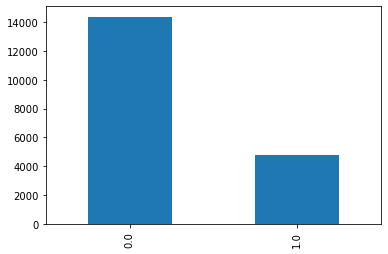

In [10]:
train['target'].value_counts().plot.bar();

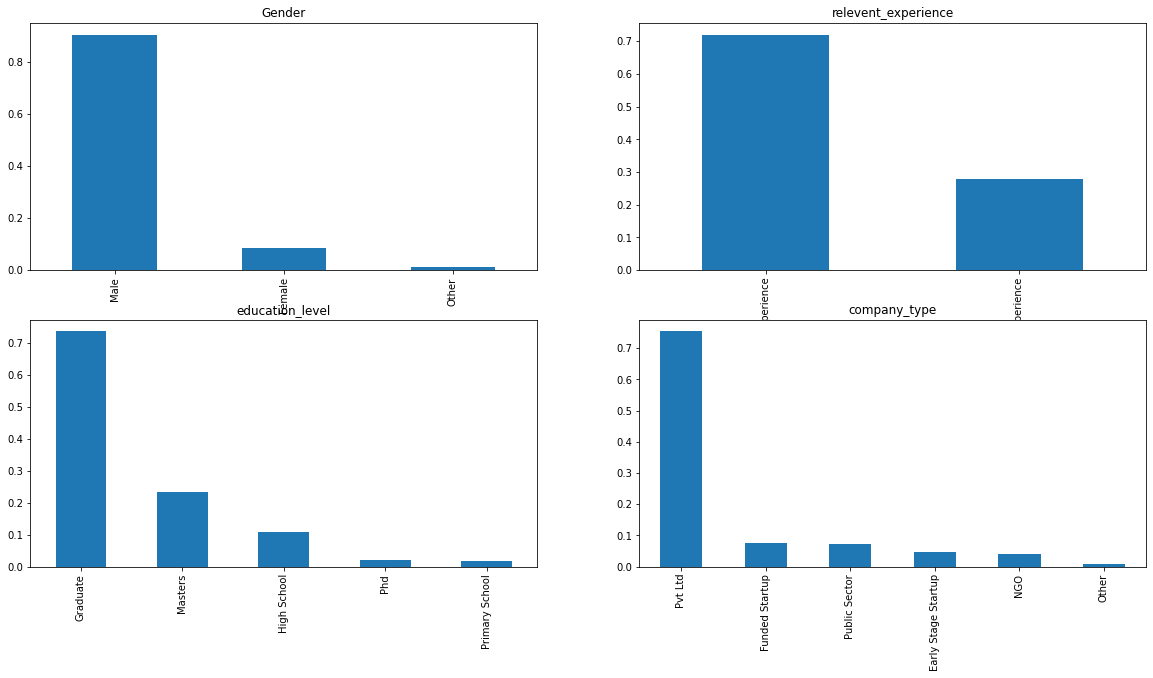

In [11]:
plt.figure(1)
plt.subplot(221) 
train['gender'].value_counts(normalize=True).plot.bar(figsize=(20, 10), title='Gender')

plt.subplot(222)
train['relevent_experience'].value_counts(normalize=True).plot.bar(title = 'relevent_experience')

plt.subplot(223)
train['enrolled_university'].value_counts(normalize=True).plot.bar(title = 'enrolled_university')

plt.subplot(223)
train['education_level'].value_counts(normalize=True).plot.bar(title = 'education_level')

plt.subplot(224)
train['company_type'].value_counts(normalize=True).plot.bar(title = 'company_type')


plt.show()

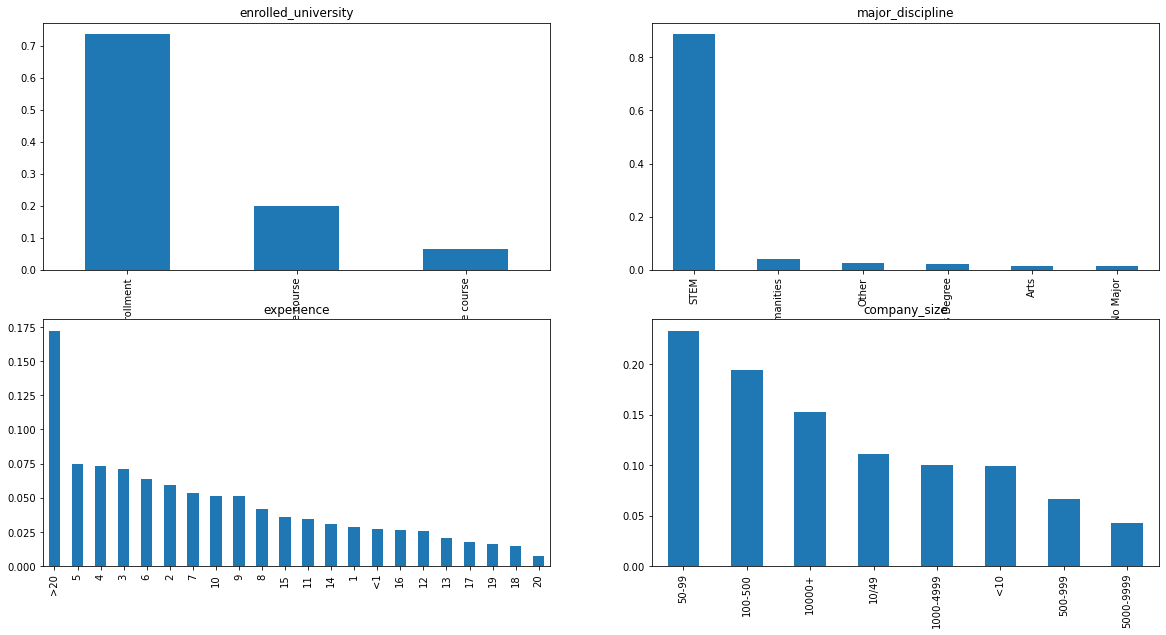

In [12]:
plt.figure(1)
plt.subplot(221) 

train['enrolled_university'].value_counts(normalize=True).plot.bar(figsize=(20, 10),title = 'enrolled_university')


plt.subplot(222)
train['major_discipline'].value_counts(normalize=True).plot.bar(title = 'major_discipline')


plt.subplot(223)
train['experience'].value_counts(normalize=True).plot.bar(title = 'experience')


plt.subplot(224)
train['company_size'].value_counts(normalize=True).plot.bar(title = 'company_size')

plt.show()

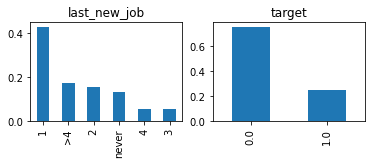

In [13]:
plt.figure(1)

plt.subplot(221) 
train['last_new_job'].value_counts(normalize=True).plot.bar(title = 'last_new_job')

plt.subplot(222)
train['target'].value_counts(normalize=True).plot.bar(title = 'target')

plt.show()

In [14]:
# plt.figure(1) 
# plt.subplot(121) 
# sns.distplot(train['gender']); 

# plt.subplot(122) 
# train['gender'].plot.box(figsize=(16,5)) 
# plt.show()

In [15]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [16]:
train['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

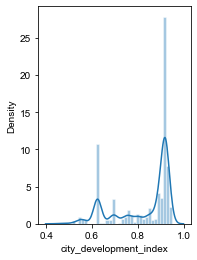

In [17]:
plt.figure(1)
plt.subplot(121)
sns.set(rc={'figure.figsize':(17, 7)})
sns.distplot(train['city_development_index'])
plt.show()

In [18]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [19]:
train.drop(['enrollee_id', 'city'], axis = 1, inplace=True)

In [20]:
train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [21]:
train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [22]:
train['gender'].isnull().sum()

4508

# Choosing left value

In [23]:
train['company_size'] = train['company_size'].str.split('-').str[0]
test['company_size'] = test['company_size'].str.split('-').str[0]

# Replacing value

In [24]:
train.last_new_job[train.last_new_job == 'never']   = 0 
test.last_new_job[test.last_new_job == 'never']   = 0

# Replacing Punctuations

In [25]:
train['experience'] = train['experience'].str.replace('[^\w\s]','')
train['last_new_job'] = train['last_new_job'].str.replace('[^\w\s]','')
train['company_size'] = train['company_size'].str.replace('[^\w\s]','')

test['experience'] = test['experience'].str.replace('[^\w\s]','')
test['last_new_job'] = test['last_new_job'].str.replace('[^\w\s]','')
test['company_size'] = test['company_size'].str.replace('[^\w\s]','')

# Forward fill

In [26]:
train['gender'] = train['gender'].fillna(method = 'ffill')
train['enrolled_university'] = train['enrolled_university'].fillna(method = 'ffill')
train['education_level'] = train['education_level'].fillna(method = 'ffill')
train['major_discipline'] = train['major_discipline'].fillna(method = 'ffill')
train['experience'] = train['experience'].fillna(method = 'ffill')
train['company_type'] = train['company_type'].fillna(method = 'ffill')
train['company_type'] = train['company_type'].fillna(method = 'bfill')

test['gender'] = test['gender'].fillna(method = 'ffill')
test['enrolled_university'] = test['enrolled_university'].fillna(method = 'ffill')
test['education_level'] = test['education_level'].fillna(method = 'ffill')
test['major_discipline'] = test['major_discipline'].fillna(method = 'ffill')
test['experience'] = test['experience'].fillna(method = 'ffill')
test['company_type'] = test['company_type'].fillna(method = 'ffill')
test['company_type'] = test['company_type'].fillna(method = 'bfill')

# cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'company_type' ]
# train.loc[:,cols] = train.loc[:,cols].ffill()

# replace nan with zero

In [27]:
# test['company_size'].unique()

In [28]:
train["company_size"]=train["company_size"].replace([np.NaN, 1049], [0, 1000])
train["last_new_job"]=train["last_new_job"].replace(np.NaN, 0) 

test["company_size"]=test["company_size"].replace([np.NaN, 1049], [0, 1000])
test["last_new_job"]=test["last_new_job"].replace(np.NaN, 0) 

 # Change data types

In [29]:
train['experience'] = train['experience'].astype(int) 
train['company_size'] = train['company_size'].astype(int)
train['last_new_job'] = train['last_new_job'].astype(int) 

test['experience'] = test['experience'].astype(int) 
test['company_size'] = test['company_size'].astype(int)
test['last_new_job'] = test['last_new_job'].astype(int)

# mean

In [30]:
a=train['company_size'].mean()
b=train['last_new_job'].mean()

train['company_size'] = train['company_size'].replace(0, a+5).astype('int')
train['last_new_job'] = train['last_new_job'].replace(0, b).astype('int')
train['experience'].fillna(train['experience'].mean(), inplace=True) 

c=test['company_size'].mean()
d=test['last_new_job'].mean()

test['company_size'] = test['company_size'].replace(0, c+25).astype('int')
test['last_new_job'] = test['last_new_job'].replace(0, d).astype('int')
test['experience'].fillna(test['experience'].mean(), inplace=True)

# Label Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
train['gender'] = le_gender.fit_transform(train.gender)
le_revexp = LabelEncoder()
train['relevent_experience'] = le_revexp.fit_transform(train.relevent_experience)
le_enr_uni = LabelEncoder()
train['enrolled_university'] = le_enr_uni.fit_transform(train.enrolled_university)
le_mjr_dis = LabelEncoder()
train['major_discipline'] = le_mjr_dis.fit_transform(train.major_discipline)
le_cmp_type = LabelEncoder()
train['company_type'] = le_cmp_type.fit_transform(train.company_type) 

test['gender'] = le_gender.fit_transform(test.gender)
test['relevent_experience'] = le_revexp.fit_transform(test.relevent_experience)
test['enrolled_university'] = le_enr_uni.fit_transform(test.enrolled_university)
test['major_discipline'] = le_mjr_dis.fit_transform(test.major_discipline)
test['company_type'] = le_cmp_type.fit_transform(test.company_type) 

In [32]:
pickle.dump(le_gender, open('Lencoder_gender.pkl', 'wb'))
pickle.dump(le_revexp, open('Lencoder_rev_exp.pkl', 'wb'))
pickle.dump(le_enr_uni, open('Lencoder_enr_uni.pkl', 'wb'))
pickle.dump(le_mjr_dis, open('Lencoder_mjr_dis.pkl', 'wb'))
pickle.dump(le_cmp_type, open('Lencoder_cmp_type.pkl', 'wb'))

# Ordinal Encoding

In [33]:
education_level_Dict = {'Primary School':1,
             'High School':2, 
             'Graduate':3, 
             'Masters':4,
             'Phd':5}
train['education_level'] = train.education_level.map(education_level_Dict)

education_level_Dict2 = {'Primary School':1,
             'High School':2, 
             'Graduate':3, 
             'Masters':4,
             'Phd':5}
test['education_level'] = test.education_level.map(education_level_Dict2)


In [34]:
train 

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,0,2,3,5,20,1400,5,1,36,1.0
1,0.776,1,1,2,3,5,15,50,5,4,47,0.0
2,0.624,1,1,0,3,5,5,1400,5,1,83,0.0
3,0.789,1,1,0,3,1,1,1400,5,1,52,1.0
4,0.767,1,0,2,4,5,20,50,1,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1,1,2,3,2,14,1400,1,1,42,1.0
19154,0.920,1,0,2,3,5,14,1400,1,4,52,1.0
19155,0.920,1,0,2,3,5,20,50,5,4,44,0.0
19156,0.802,1,0,2,2,5,1,500,5,2,97,0.0


# Outlier Treatment

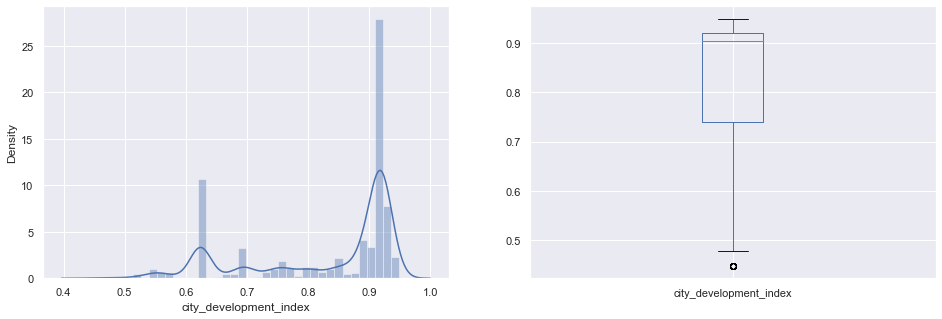

In [35]:
plt.figure(1) 
plt.subplot(221) 
sns.distplot(train['city_development_index']); 

plt.subplot(222) 
train['city_development_index'].plot.box(figsize=(16,11)) 


plt.show()

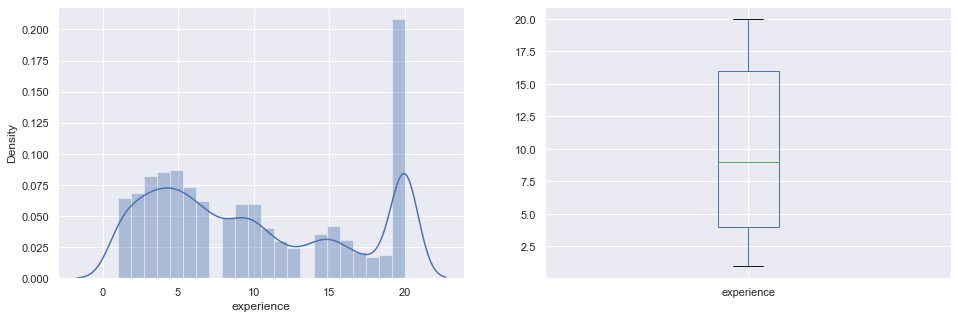

In [36]:
plt.figure(1) 
plt.subplot(221) 
sns.distplot(train['experience']); 

plt.subplot(222) 
train['experience'].plot.box(figsize=(16,11)) 


plt.show()

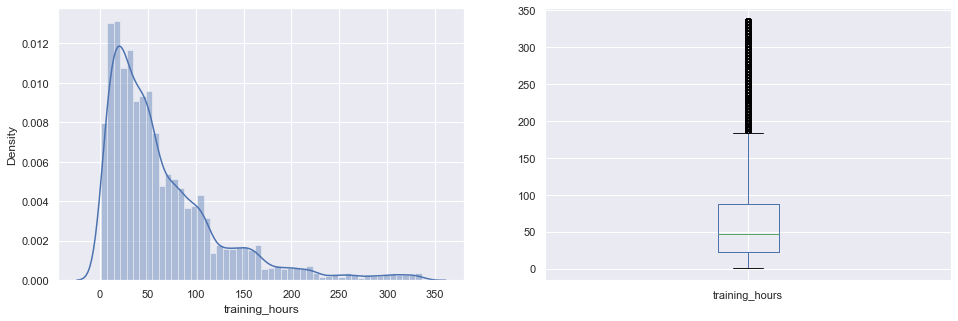

In [37]:
plt.subplot(221) 
sns.distplot(train['training_hours']); 

plt.subplot(222) 
train['training_hours'].plot.box(figsize=(16,11)) 


plt.show()

# skewness

In [38]:
train.skew(axis = 0, skipna = True)

city_development_index   -0.995428
gender                   -1.810806
relevent_experience       0.979527
enrolled_university      -1.261835
education_level          -0.086391
major_discipline         -3.176678
experience                0.360111
company_size              2.189913
company_type             -1.843835
last_new_job              0.845775
training_hours            1.819237
target                    1.158815
dtype: float64

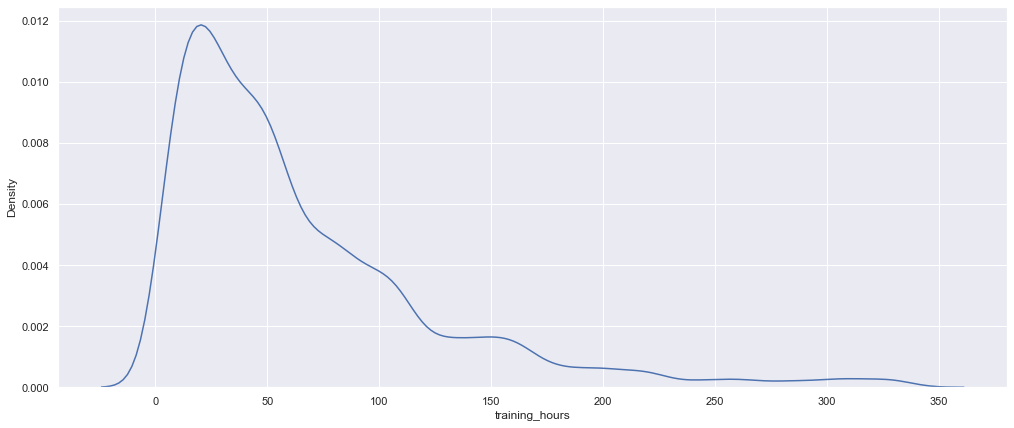

In [39]:
sns.distplot(train['training_hours'], hist=False, kde=True);

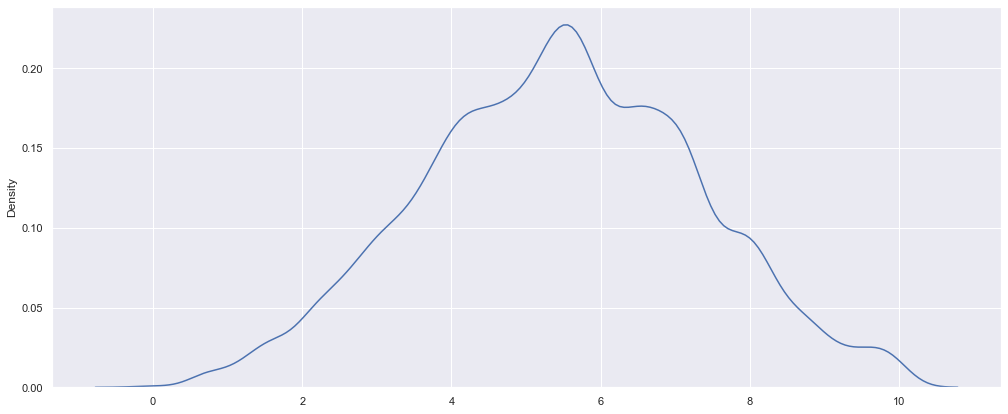

In [40]:
transformed_data, best_lambda = boxcox(train['training_hours'])
sns.distplot(transformed_data, hist=False, kde=True);


In [41]:
train['training_hours'] = transformed_data

In [42]:
train.dtypes

city_development_index    float64
gender                      int32
relevent_experience         int32
enrolled_university         int32
education_level             int64
major_discipline            int32
experience                  int32
company_size                int32
company_type                int32
last_new_job                int32
training_hours            float64
target                    float64
dtype: object

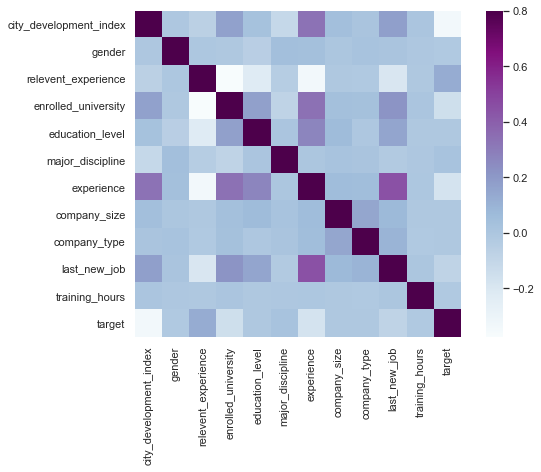

In [43]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu');

In [44]:
y = train.target
X=train.drop(['target'], axis=1)


In [45]:
X

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,1,0,2,3,5,20,1400,5,1,4.958749
1,0.776,1,1,2,3,5,15,50,5,4,5.464899
2,0.624,1,1,0,3,5,5,1400,5,1,6.625445
3,0.789,1,1,0,3,1,1,1400,5,1,5.662980
4,0.767,1,0,2,4,5,20,50,1,4,2.501093
...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1,1,2,3,2,14,1400,1,1,5.248538
19154,0.920,1,0,2,3,5,14,1400,1,4,5.662980
19155,0.920,1,0,2,3,5,20,50,5,4,5.337514
19156,0.802,1,0,2,2,5,1,500,5,2,6.963912


In [46]:
# train['city_development_index']

In [47]:
 X_train, X_test, y_train,y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [48]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn import metrics

In [49]:
from sklearn import tree
i = 1
kf = StratifiedKFold(n_splits=5, random_state=2, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    Decimodel = tree.DecisionTreeClassifier(random_state=1)
    Decimodel.fit(xtr, ytr)
    pred_test = Decimodel.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i +=1
    
pred = Decimodel.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7116388308977035

2 of kfold 5
accuracy_score 0.7045929018789144

3 of kfold 5
accuracy_score 0.7111169102296451

4 of kfold 5
accuracy_score 0.7105194466196816

5 of kfold 5
accuracy_score 0.721221613155834


In [50]:
pred=Decimodel.predict(X_test)
k=confusion_matrix(y_test, pred)
k

array([[4181,  148],
       [ 155, 1264]], dtype=int64)

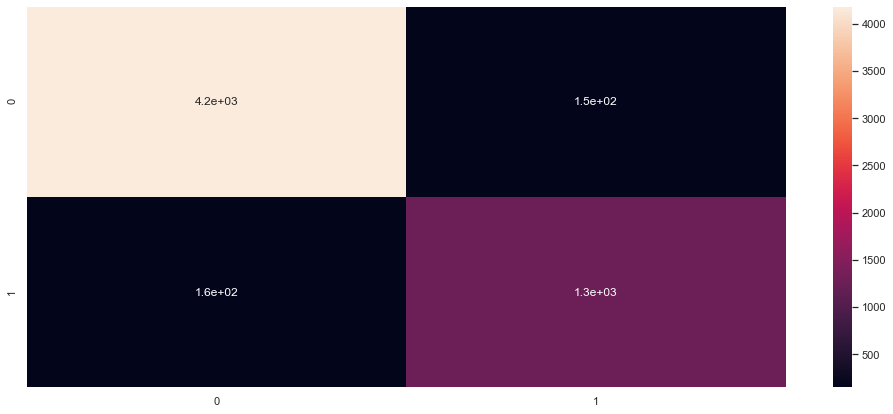

In [51]:
sns.heatmap(k,annot=True);

In [52]:
y_test.shape

(5748,)

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      4329
         1.0       0.90      0.89      0.89      1419

    accuracy                           0.95      5748
   macro avg       0.93      0.93      0.93      5748
weighted avg       0.95      0.95      0.95      5748



In [54]:
pickle.dump(Decimodel, open('Decitmodel.pkl', 'wb'))